Open the image file yeast.png (source http://www.microbehunter.com/the-hemocytometer-counting-chamber/). It shows yeast cells in a hemocytometer. Count the number of yeast cells using scipy.ndimage.label. Start by selecting an appropriate threshold to seperate background from foreground, and visualize this "mask". Try out different intensity thresholds and choose the one where you like the results best.

Note: It is not important to find the optimal threshold value; you are just supposed to show you understand how the label function works.

In [24]:
import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import skimage
from skimage import data 
from skimage import io


# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['ytick.major.pad'] = 4

plt.rcParams.update({'font.size' : 8})
font = {'fontsize'   : 8}
font1 = {'fontsize'   : 8}

In [25]:
import scipy.misc

In [26]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andres2085/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


yeast = io.imread('/home/andres2085/Git_Repositorios/python_codes/yeast.jpg', flatten=True)
plt.imshow(yeast, cmap=plt.cm.gray);
plt.grid()
plt.title('yeast cells in a hemocytometer', size=10, fontweight='bold')
plt.show()

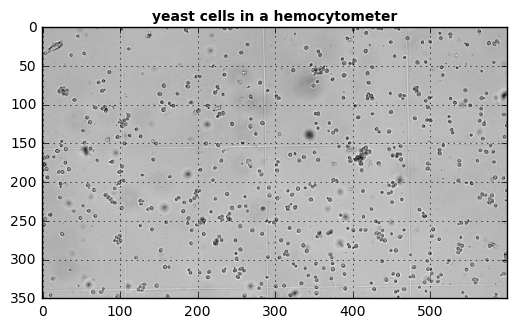

In [27]:
yeast = io.imread('/home/andres2085/Git_Repositorios/python_codes/yeast.jpg', flatten=True)
plt.imshow(yeast, cmap=plt.cm.gray);
plt.grid() 
#plt.yticks([0, 50, 100, 150, 200, 250, 300, 350])
plt.ylim([350,0])
plt.title('yeast cells in a hemocytometer', size=10, fontweight='bold') 
plt.show()

In [38]:
#2)-- finding the minimum and maximum values of the image array
print(yeast.min(), yeast.max())

0.124860784314 1.0


In [28]:
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['ytick.major.pad'] = 4

plt.rcParams.update({'font.size' : 14})
font = {'fontsize'   : 12}
font1 = {'fontsize'   : 12}

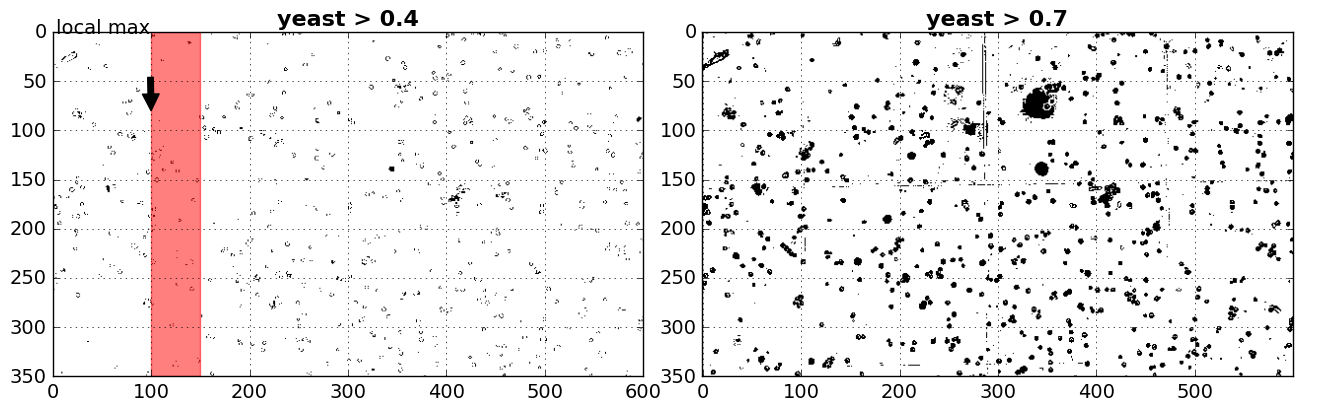

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
subplot_kw=dict())
fig.subplots_adjust(wspace=0.1)

#plt.subplot(1,2,1)
ax[0].imshow(yeast > 0.4, cmap = cm.Greys_r)
ax[0].set_title('yeast > 0.4', size=16, fontweight='bold')
ax[0].set_ylim([350,0])
ax[0].set_xlim(0, 600)
ax[0].grid()

#plt.subplot(1,2,2)
ax[1].imshow(yeast > 0.7, cmap = cm.Greys_r)
ax[1].set_title('yeast > 0.7', size=16, fontweight='bold')
ax[1].set_ylim([350,0])
ax[1].grid()

ax[0].annotate('local max', xy=(100, 80), xytext=(3, 1.5),
arrowprops=dict(facecolor='black', shrink=0.5))

import matplotlib.patches as patches
import matplotlib.transforms as transforms
# y coord are axes
trans = transforms.blended_transform_factory(
ax[0].transData, ax[0].transAxes)
# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to
# span from 0..1 in axes coords
rect = patches.Rectangle((100,0), width=50, height=1,
transform=trans, color='red',
alpha=0.5)
ax[0].add_patch(rect)

plt.show();

In [59]:
n = scipy.ndimage.label(yeast>0.8)
n

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32), 3168)

In [31]:
#3242 number of yeast cells

In [53]:
np.shape(yeast)

(399, 600)